In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math

In [52]:
def ccw(A, B, C):
    return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])


def intersect(A, B, C, D):
    return ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D)

In [77]:
def detect_cone(img, outline=False, label=False):
    # contours and bounding rectangles that will be returned
    conts, rects = [], []
    
    # find contours
    blur_img = cv2.GaussianBlur(img, (49, 49), 0)
    hsv_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)
    mask_img = cv2.inRange(hsv_img, np.array([90, 150, 150]), np.array([110, 255, 255]))
    contours, hierarchy = cv2.findContours(mask_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for i, cont in enumerate(contours):
        # filter out contours with a small area
        area = cv2.contourArea(cont)
        if area >= 1000:
            conts.append(cont)
            
            # find the smallest rectangle around the contour
            rect = cv2.minAreaRect(cont)
            rect = cv2.boxPoints(rect)
            rect = np.int0(rect)
            rects.append(rect)
            
            # draw the contour and rectangle
            if outline:
                cv2.drawContours(img, [cont], -1, (0, 255, 0), 2)
                cv2.drawContours(img, [rect], -1, (255, 0, 0), 2)
                
            # label the coordinates of the vertices of the rectangle
            if label:
                for j, point in enumerate(rect):
                    x = rect[j][0]
                    y = rect[j][1]
                    cv2.putText(img, str(x) + ", " + str(y), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    
    conts = np.asarray(conts)
    rects = np.asarray(rects)
    return conts, rects
    

def detect_base(img, rects, draw_line=False):
    base1, base2 = [], []
    points = rects.reshape(8, 2)
    
    for i, point in enumerate(points):
            p1 = points[(i+0) % 4]
            p2 = points[(i+1) % 4]
            p3 = points[(i+2) % 4]
            p4 = points[(i+3) % 4]
            p5 = points[(i+4) % 4]
            p6 = points[(i+5) % 4]
            p7 = points[(i+6) % 4]
            p8 = points[(i+7) % 4]
            cv2.line(img, tuple(p1), tuple(p5), (0, 0, 255), 2)

            if intersect(p1, p5, p2, p3) or intersect(p1, p5, p3, p4) or intersect(p1, p5, p6, p7) or intersect(p1, p5, p7, p8):
                    
                    base1.append(p1)
                    base2.append(p5)
                    if draw_line:

                        cv2.line(img, tuple(p1), tuple(p5), (0, 0, 255), 2)
    
#     for i in range(0, 4):
#         if intersect(p[i], p[i+4], p[i+1], p[i+2]) or intersect(p[i], p[i+4], p[i+2], p[i+3]) or \
#         intersect(p[i], p[i+4], p[(i+5)%8], p[(i+6)%8]) or intersect(p[i], p[i+4], p[(i+6)%8], p[(i+7)%8]):
#             base1.append(p[i])
#             base2.append(p[i+4])
#             print("hi")
            
#             if draw_line:
#                 cv2.line(img, tuple(p[i]), tuple(p[i+4]), (0, 0, 255), 2)

    
        

In [73]:
def cone_angle(img):
    # find and label contours and bounding rectangles
    conts, rects = detect_cone(img, True, True)
    
    if len(rects) == 2:
        # find the base of the cone
        detect_base(img, rects, True)
        
    return img

In [2]:

         
   
   
   
 

    base1 = np.asarray(base1)
    base2 = np.asarray(base2)
   
    cone_base = []
    cone_base_index = 0
   
    if calc_dist(base1[0][0], base1[1][0], base1[0][1], base1[1][1]) > calc_dist(base2[0][0], base2[1][0], base2[0][1], base2[1][1]):
        cv2.line(return_img, tuple(base1[0]), tuple(base1[1]), line_color, 2)
        cone_base = boxes[0]
        cone_base_index = 0
    else:
        cv2.line(return_img, tuple(base2[0]), tuple(base2[1]), line_color, 2)
        cone_base = boxes[1]
        cone_base_index = 1
   
    cv2.drawContours(return_img, [cone_base], -1, (255, 255, 255), 2)
    M1 = cv2.moments(cone_base)
    try:
        cX1 = int((M1["m10"] / M1["m00"]))
        cY1 = int((M1["m01"] / M1["m00"]))
    except:
        cX1 = 0
        cY1 = 0
           
    M2 = cv2.moments(boxes[(cone_base_index+1) % 2])
    try:
        cX2 = int((M2["m10"] / M2["m00"]))
        cY2 = int((M2["m01"] / M2["m00"]))
    except:
        cX2 = 0
        cY2 = 0
    c1 = (cX1, cY1)
    c2 = (cX2, cY2)
    print(c1)
    print(c2)
                           
    cv2.line(return_img, c1, c2, line_color, 2)
    print(abs(cY2-cY1))
    print(abs(cY2-cY1)/(calc_dist(cX1, cX2, cY1, cY2)))
    degree = math.degrees(math.atan2(cY2-cY1, cX2-cX1)) + 90
    print(degree)

       
    return return_img

In [ ]:
def calc_dist(x1, x2, y1, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dist = math.sqrt((dx ** 2) + (dy **2))
   
    return dist    





def detect_cone(img, low_thresh=np.array([90, 150, 150]), high_thresh=np.array([110, 255, 255]), cnt_color=(0, 255, 0), rect_color=(255, 0, 0), line_color=(0, 0, 255)):
    # image that will be returned at end
    return_img = img.copy()
   
    # find contours of image
    blur_img = cv2.GaussianBlur(img, (49, 49), 0)
    hsv_img = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)
    mask_img = cv2.inRange(hsv_img, low_thresh, high_thresh)
    cnts, hierarchy = cv2.findContours(mask_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
   
    boxes = []
   
    for i, c in enumerate(cnts):
        # find center of contour
        M = cv2.moments(c)
        try:
            cX = int((M["m10"] / M["m00"]))
            cY = int((M["m01"] / M["m00"]))
        except:
            cX = 0
            cY = 0
           
        # filter out small contours
        area = cv2.contourArea(c)
        if area >= 1000:
            # find the smallest rectangle around the contour
            rect = cv2.minAreaRect(c)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            boxes.append(box)
            # draw contour and rectangle
            cv2.drawContours(return_img, [c], -1, cnt_color, 2)
            cv2.drawContours(return_img, [box], -1, rect_color, 2)
           
            # lable rectangle vertices
            for j, b in enumerate(box):
                if j == 3:
                    dist = calc_dist(box[j][0], box[0][0], box[j][1], box[0][1])
                else:
                    dist = calc_dist(box[j][0], box[j+1][0], box[j][1], box[j+1][1])
                cv2.putText(return_img, (str(box[j][0]) + ", " + str(box[j][1])), (box[j][0] - 35, box[j][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
   
    boxes = np.asarray(boxes)
   
    if len(boxes) == 2:
        base1 = []
        base2 = []
        for k, p1 in enumerate(boxes[0]):
            p1 = boxes[0][k]
            p2 = boxes[0][(k+1) % 4]
            p3 = boxes[0][(k+2) % 4]
            p4 = boxes[0][(k+3) % 4]
            p5 = boxes[1][k]
            p6 = boxes[1][(k+1) % 4]
            p7 = boxes[1][(k+2) % 4]
            p8 = boxes[1][(k+3) % 4]

            if intersect(p1, p5, p2, p3) or intersect(p1, p5, p3, p4) or intersect(p1, p5, p6, p7) or intersect(p1, p5, p7, p8):
                    base1.append(p1)
                    base2.append(p5)
                    cv2.line(return_img, tuple(p1), tuple(p5), line_color, 2)

    base1 = np.asarray(base1)
    base2 = np.asarray(base2)
   
    cone_base = []
    cone_base_index = 0
   
    if calc_dist(base1[0][0], base1[1][0], base1[0][1], base1[1][1]) > calc_dist(base2[0][0], base2[1][0], base2[0][1], base2[1][1]):
        cv2.line(return_img, tuple(base1[0]), tuple(base1[1]), line_color, 2)
        cone_base = boxes[0]
        cone_base_index = 0
    else:
        cv2.line(return_img, tuple(base2[0]), tuple(base2[1]), line_color, 2)
        cone_base = boxes[1]
        cone_base_index = 1
   
    cv2.drawContours(return_img, [cone_base], -1, (255, 255, 255), 2)
    M1 = cv2.moments(cone_base)
    try:
        cX1 = int((M1["m10"] / M1["m00"]))
        cY1 = int((M1["m01"] / M1["m00"]))
    except:
        cX1 = 0
        cY1 = 0
           
    M2 = cv2.moments(boxes[(cone_base_index+1) % 2])
    try:
        cX2 = int((M2["m10"] / M2["m00"]))
        cY2 = int((M2["m01"] / M2["m00"]))
    except:
        cX2 = 0
        cY2 = 0
    c1 = (cX1, cY1)
    c2 = (cX2, cY2)
    print(c1)
    print(c2)
                           
    cv2.line(return_img, c1, c2, line_color, 2)
    print(abs(cY2-cY1))
    print(abs(cY2-cY1)/(calc_dist(cX1, cX2, cY1, cY2)))
    degree = math.degrees(math.atan2(cY2-cY1, cX2-cX1)) + 90
    print(degree)

       
    return return_img

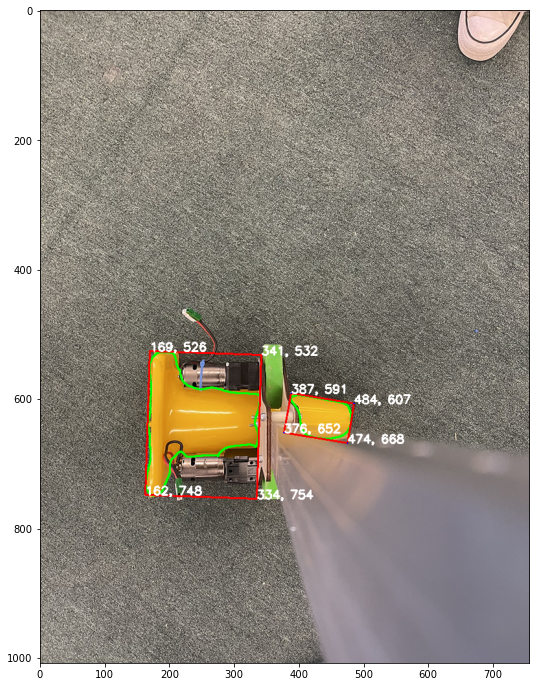

In [78]:
img = mpimg.imread('cone2_small.jpg')
rotated_img = rotate_img(img, 0, 1.0)
detected_img = cone_angle(rotated_img)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)
plt.show()